This project is created to learn sentiment text identification from twitter. 
Two packages are used: 
1. NLTK http://www.nltk.org/
2. Spacy https://spacy.io/

Thanks for the terrific work done by Laurent Luce, referred from http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/

Install NLTK package
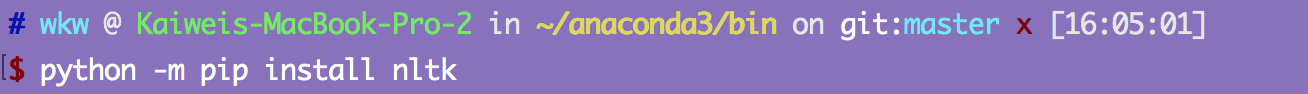

This post describes the implementation of sentiment analysis of tweets using Python and the natural language toolkit NLTK. The post also describes the internals of NLTK related to this implementation.

Background
The purpose of the implementation is to be able to automatically classify a tweet as a positive or negative tweet sentiment wise.

The classifier needs to be trained and to do that, we need a list of manually classified tweets. Let’s start with 5 positive tweets and 5 negative tweets.

Positive tweets:

I love this car.
This view is amazing.
I feel great this morning.
I am so excited about the concert.
He is my best friend.
Negative tweets:

I do not like this car.
This view is horrible.
I feel tired this morning.
I am not looking forward to the concert.
He is my enemy.
In the full implementation, I use about 600 positive tweets and 600 negative tweets to train the classifier. I store those tweets in a Redis DB. Even with those numbers, it is quite a small sample and you should use a much larger set if you want good results.

Next is a test set so we can assess the exactitude of the trained classifier.

Test tweets:

I feel happy this morning. positive.
Larry is my friend. positive.
I do not like that man. negative.
My house is not great. negative.
Your song is annoying. negative.

**Implementation**

The following list contains the positive tweets:

In [1]:
pos_tweets = [('I love this car', 'positive'),\
              ('This view is amazing', 'positive'),\
              ('I feel great this morning', 'positive'),\
              ('I am so excited about the concert', 'positive'),\
              ('He is my best friend', 'positive')]

The following list contains the negative tweets:

In [2]:
neg_tweets = [('I do not like this car', 'negative'),\
              ('This view is horrible', 'negative'),\
              ('I feel tired this morning', 'negative'),\
              ('I am not looking forward to the concert', 'negative'),\
              ('He is my enemy', 'negative')]

We take both of those lists and create a single list of tuples each containing two elements. First element is an array containing the words and second element is the type of sentiment. We get rid of the words smaller than 2 characters and we use lowercase for everything

In [3]:
tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))


The list of tweets now looks like this:

In [4]:
tweets = [(['love', 'this', 'car'], 'positive'),\
          (['this', 'view', 'amazing'], 'positive'),\
          (['feel', 'great', 'this', 'morning'], 'positive'),\
          (['excited', 'about', 'the', 'concert'], 'positive'),\
          (['best', 'friend'], 'positive'),\
          (['not', 'like', 'this', 'car'], 'negative'),\
          (['this', 'view', 'horrible'], 'negative'),\
          (['feel', 'tired', 'this', 'morning'], 'negative'),\
          (['not', 'looking', 'forward', 'the', 'concert'], 'negative'),\
          (['enemy'], 'negative')]

Finally, the list with the test tweets:

In [5]:
test_tweets = [(['feel', 'happy', 'this', 'morning'], 'positive'),\
               (['larry', 'friend'], 'positive'),\
               (['not', 'like', 'that', 'man'], 'negative'),\
               (['house', 'not', 'great'], 'negative'),\
               (['your', 'song', 'annoying'], 'negative')]
